In [1]:
import pandas as pd

In [2]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [7]:
!wget -O  data.csv 'https://www.datos.gov.co/api/views/75fz-q98y/rows.csv?accessType=DOWNLOAD&bom=true&format=true'

--2023-03-15 19:01:37--  https://www.datos.gov.co/api/views/75fz-q98y/rows.csv?accessType=DOWNLOAD&bom=true&format=true
Resolving www.datos.gov.co (www.datos.gov.co)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to www.datos.gov.co (www.datos.gov.co)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: 'data.csv'

data.csv                [   <=>              ]  32.44M  3.65MB/s    in 14s     

2023-03-15 19:01:52 (2.29 MB/s) - 'data.csv' saved [34021154]



In [8]:
df = pd.read_csv('data.csv')

/var/folders/44/1tt4k8ts7t971j15mrfb2mq40000gn/T/ipykernel_85860/1507164070.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In [9]:
df.head()

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,1,ARMA BLANCA / CORTOPUNZANTE,BUENOS AIRES,7.170557,-73.135108,URBANA,14. Morrorico,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,30,05. Adultez,UNION LIBRE,MASCULINO,A PIE,A PIE
1,2,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.120645,-73.12605,URBANA,05. García Rovira,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,21,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
2,3,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.120645,-73.12605,URBANA,05. García Rovira,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,23,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
3,4,ARMA BLANCA / CORTOPUNZANTE,COMUNEROS,7.151359,-73.145705,URBANA,03. San Francisco,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,36,05. Adultez,CASADO,MASCULINO,A PIE,A PIE
4,5,ARMA BLANCA / CORTOPUNZANTE,GIRARDOT,7.170557,-73.135108,URBANA,04. Occidental,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,20,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE


In [10]:
df.describe()

,ORDEN,ANO,DIA
count,135076.000000,135076.000000,135076.000000
mean,67538.500000,2015.724896,15.488510
std,38993.226818,3.344696,8.811255
min,1.000000,2010.000000,1.000000
25%,33769.750000,2013.000000,8.000000
50%,67538.500000,2016.000000,15.000000
75%,101307.250000,2019.000000,23.000000
max,135076.000000,2021.000000,31.000000


Podemos mirar cuantas categorias tiene la categoria CONDUCTA : **EL NUMERO DE CONDUCTAS SON 50**
 



In [14]:
df_n = df['CONDUCTA']
np_df = np.array(df['CONDUCTA'].unique())

np_count= np.unique(df_n,return_counts=True)



In [16]:
np_count[1]

array([  805,    17,   245,   119,   462,     5,   271,   367,     3,
        1529,    15,   268,     7,    11,    12,   518,    40,  1365,
         615,    11,   204,  8937,    15,  3708, 48452,     7,  4752,
           1,    34,     4,    13, 21130, 24450,     2,    12,    72,
           5,     3,     3,    68, 16519])

El numero de veces que se repite la conducta

In [17]:

n_delitos = pd.DataFrame({'conducta':np_count[0],'contador':np_count[1]})
n_delitos

,conducta,contador
0,ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS,805
1,ACCESO CARNAL ABUSIVO CON MENOR DE 14 AÑOS (CI...,17
2,ACCESO CARNAL O ACTO SEXUAL ABUSIVO CON INCAPA...,245
3,ACCESO CARNAL O ACTO SEXUAL EN PERSONA PUESTA ...,119
4,ACCESO CARNAL VIOLENTO,462
5,ACCESO CARNAL VIOLENTO (CIRCUNSTANCIAS AGRAVAC...,5
6,ACOSO SEXUAL,271
7,ACTO SEXUAL VIOLENTO,367
8,ACTO SEXUAL VIOLENTO (CIRCUNSTANCIAS DE AGRAVA...,3
9,ACTOS SEXUALES CON MENOR DE 14 AÑOS,1529


array([[<AxesSubplot:title={'center':'contador'}>]], dtype=object)

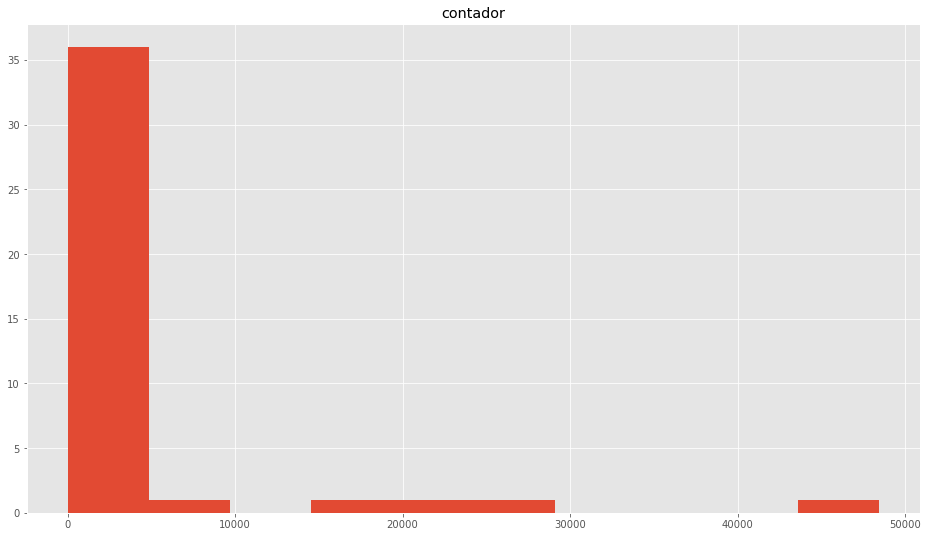

In [18]:
n_delitos.hist()

In [19]:
df_n = df['ZONA']
np_df = np.array(df['ZONA'].unique())

len(np_df)
np_df
np_count= np.unique(df_n,return_counts=True)
np_count

(array(['NO REPORTA', 'OTROS', 'RURAL', 'URBANA'], dtype=object),
 array([  2189,    157,   1183, 131547]))

In [20]:

n_delitos = pd.DataFrame({'conducta':np_count[0],'contador':np_count[1]})
n_delitos


,conducta,contador
0,NO REPORTA,2189
1,OTROS,157
2,RURAL,1183
3,URBANA,131547
